# Tratamento dos dados



In [279]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [280]:
df = pd.read_csv("/content/Hotel_Reservations.csv")

In [281]:
df.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [282]:
df_encoded =  pd.get_dummies(df, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type','booking_status'])

In [283]:
df_encoded.drop('Booking_ID', axis=1, inplace=True)

In [284]:
def def_label(price):
    if price <= 85:
        return 1
    elif price >85 and price <= 115:
        return 2
    elif price > 115:
        return 3

In [285]:
df_encoded['label_avg_price_per_room'] = df['avg_price_per_room'].apply(def_label)

In [286]:
df_encoded.drop('avg_price_per_room', axis=1, inplace=True)

# Visualização dos dados

In [287]:
df.shape

(36275, 19)

In [288]:
df_encoded.shape

(36275, 32)

In [289]:
df_encoded.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'no_of_special_requests', 'type_of_meal_plan_Meal Plan 1',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 1',
       'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5',
       'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7',
       'market_segment_type_Aviation', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online', 'booking_status_Canceled',
       'booking_status_Not_Canceled', 'label_avg_price_per_ro

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

array([[<Axes: title={'center': 'no_of_adults'}>,
        <Axes: title={'center': 'no_of_children'}>,
        <Axes: title={'center': 'no_of_weekend_nights'}>,
        <Axes: title={'center': 'no_of_week_nights'}>,
        <Axes: title={'center': 'required_car_parking_space'}>,
        <Axes: title={'center': 'lead_time'}>],
       [<Axes: title={'center': 'arrival_year'}>,
        <Axes: title={'center': 'arrival_month'}>,
        <Axes: title={'center': 'arrival_date'}>,
        <Axes: title={'center': 'repeated_guest'}>,
        <Axes: title={'center': 'no_of_previous_cancellations'}>,
        <Axes: title={'center': 'no_of_previous_bookings_not_canceled'}>],
       [<Axes: title={'center': 'no_of_special_requests'}>,
        <Axes: title={'center': 'type_of_meal_plan_Meal Plan 1'}>,
        <Axes: title={'center': 'type_of_meal_plan_Meal Plan 2'}>,
        <Axes: title={'center': 'type_of_meal_plan_Meal Plan 3'}>,
        <Axes: title={'center': 'type_of_meal_plan_Not Selected'}>,


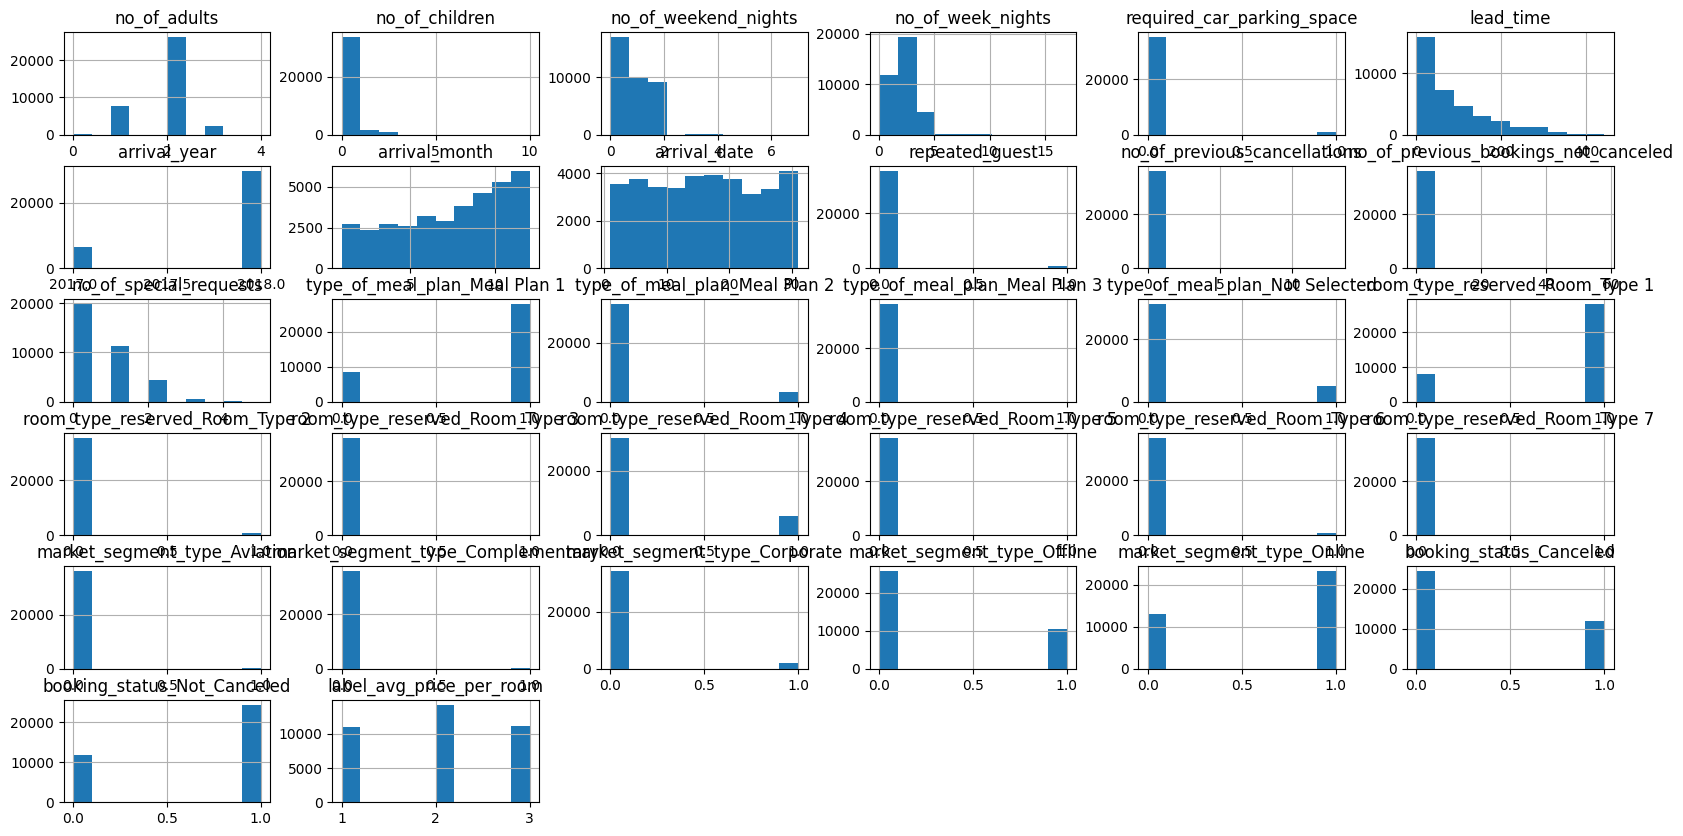

In [291]:
df_encoded.hist(figsize= (20,10))

In [292]:
X= df_encoded.drop('label_avg_price_per_room', axis= 1)

In [293]:
Y= df_encoded['label_avg_price_per_room']

In [294]:
X = np.array(X).astype('float32')
Y = np.array(Y).astype('int')

<Axes: >

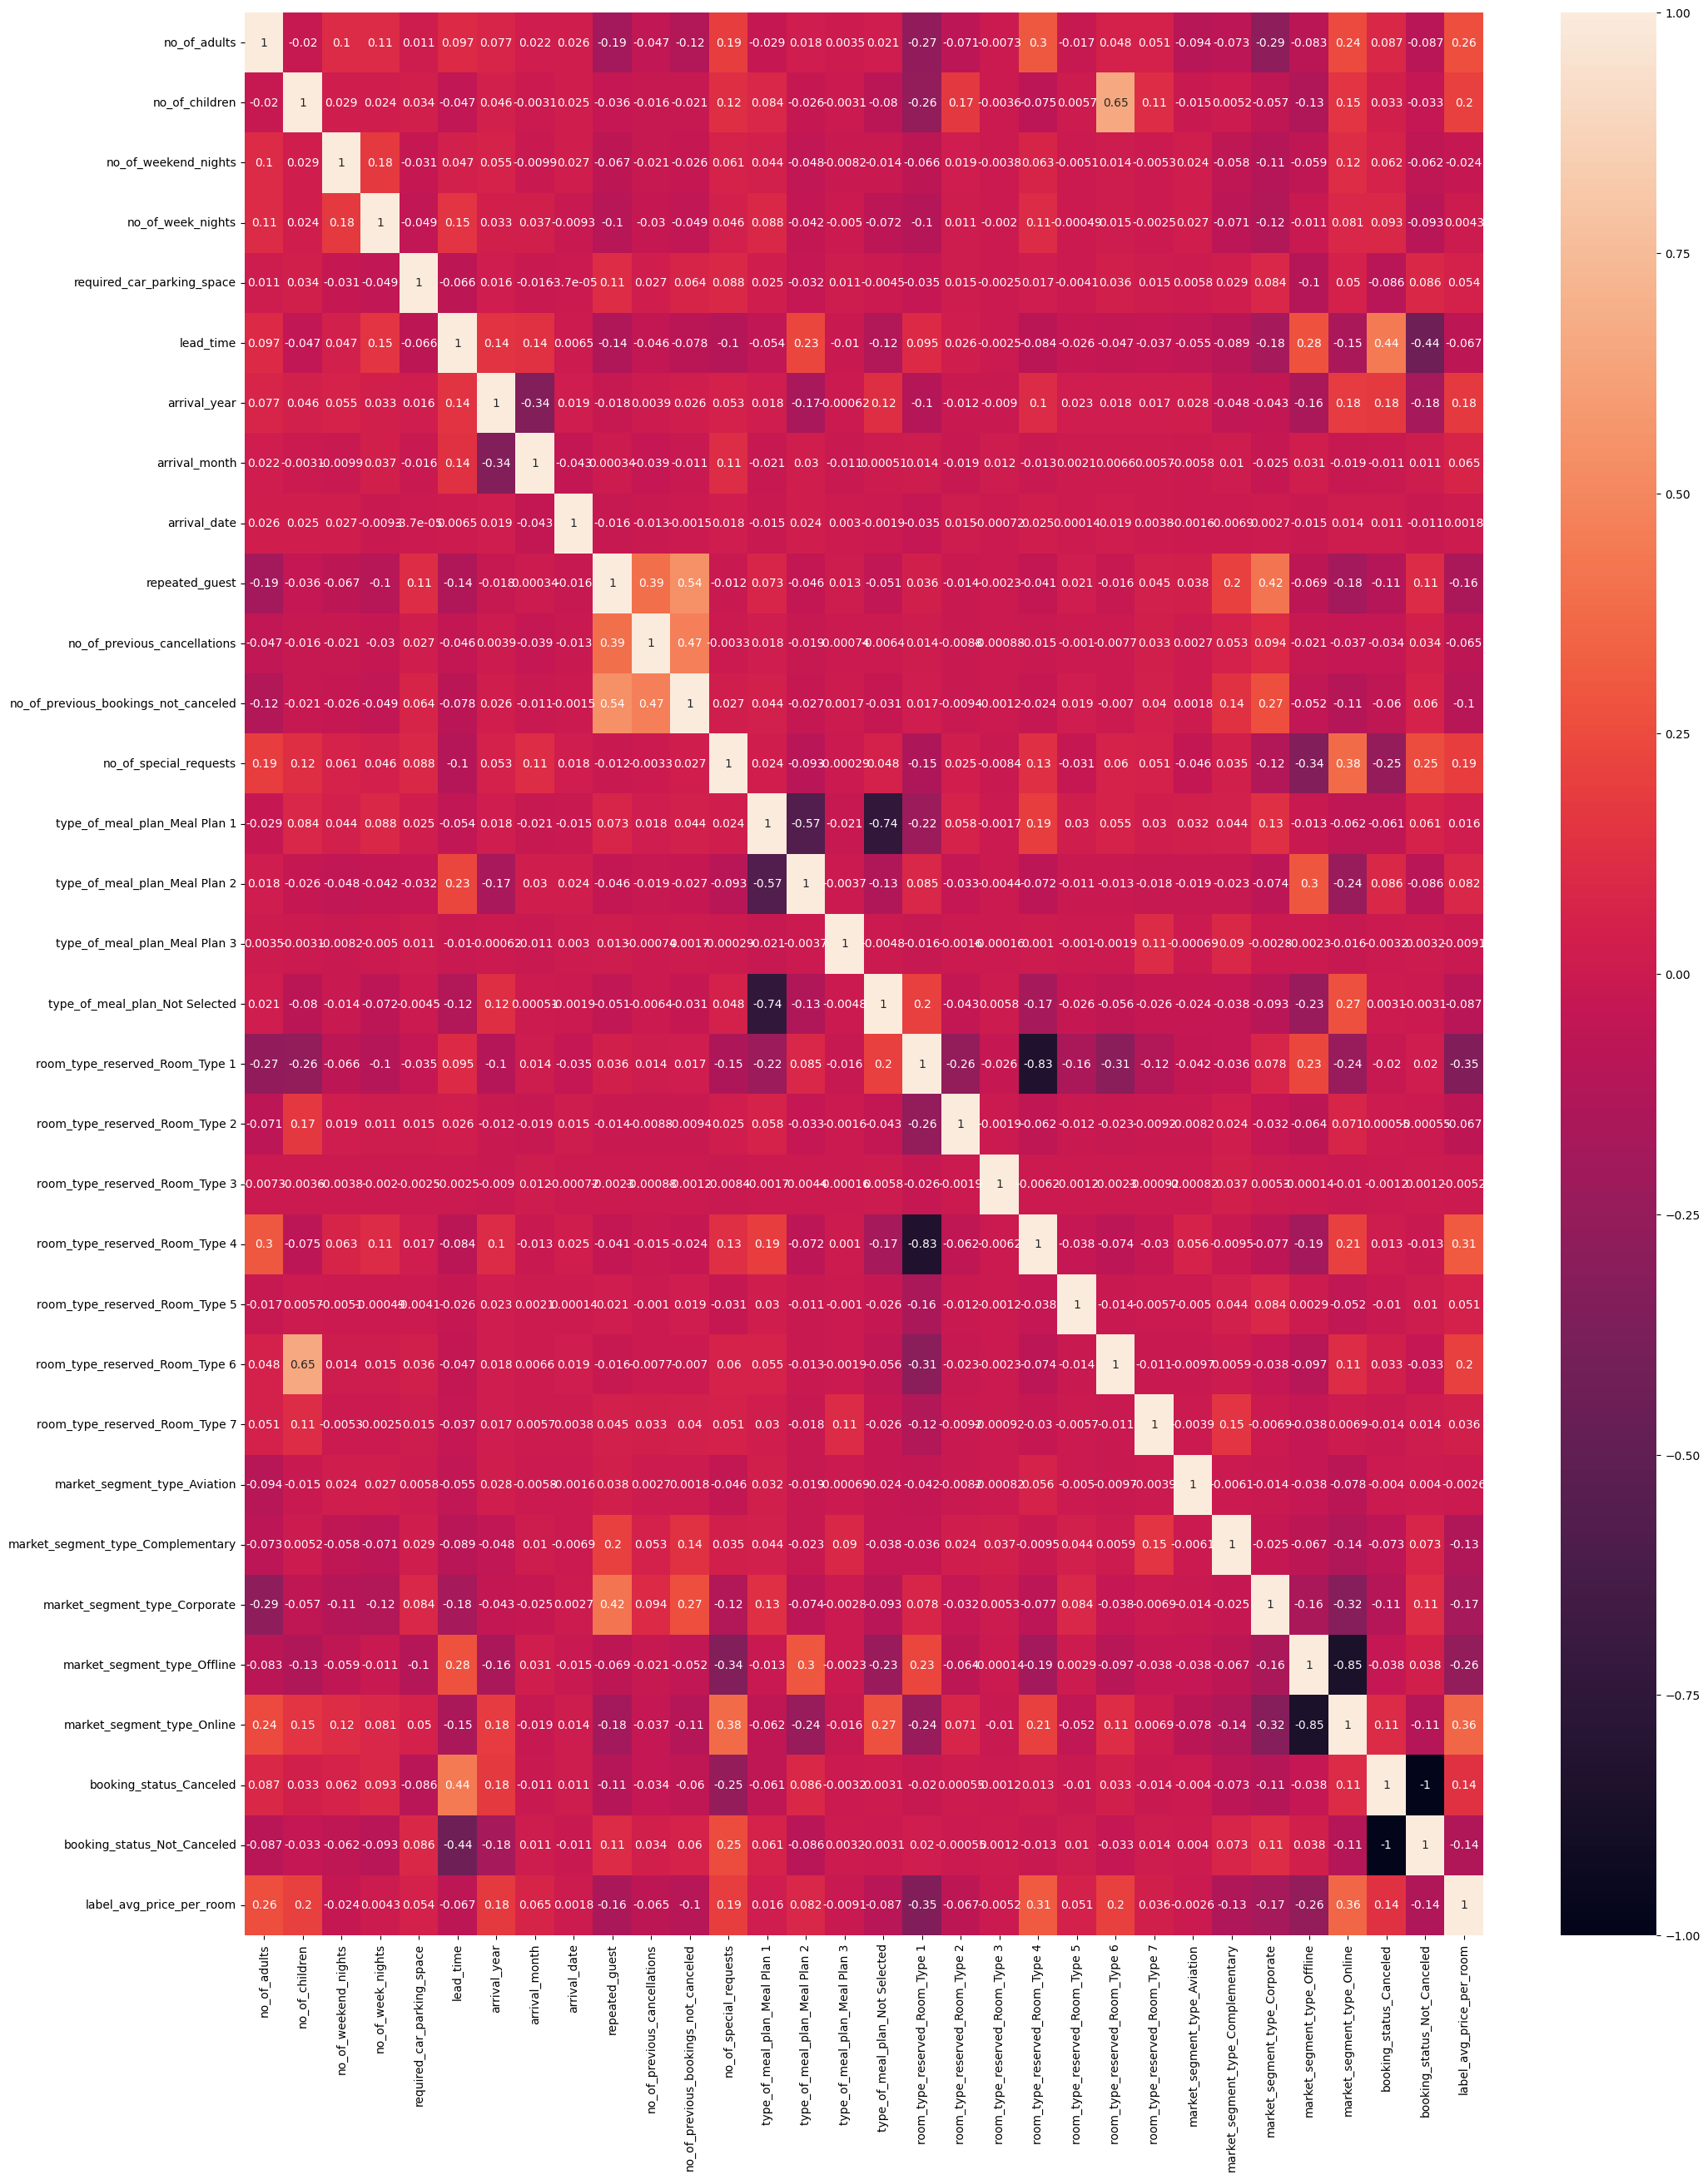

In [295]:
figure = plt.figure(figsize =(24,30))
sns.heatmap(df_encoded.corr(), annot = True)

# Divisão dos dados

In [296]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.3, random_state=True)

# Gradient Bossting

In [297]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import accuracy_score

# model_gb = GradientBoostingClassifier(n_estimators=220, max_depth=128, learning_rate=0.25)
# model_gb.fit(x_train, y_train)
# y_pred = model_gb.predict(x_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Acurácia: {accuracy}')

# Support Vector Machine (SVM)

In [298]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

model = LinearSVC()

In [299]:
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [300]:
y_pred_svm = model.predict(x_test)


In [301]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

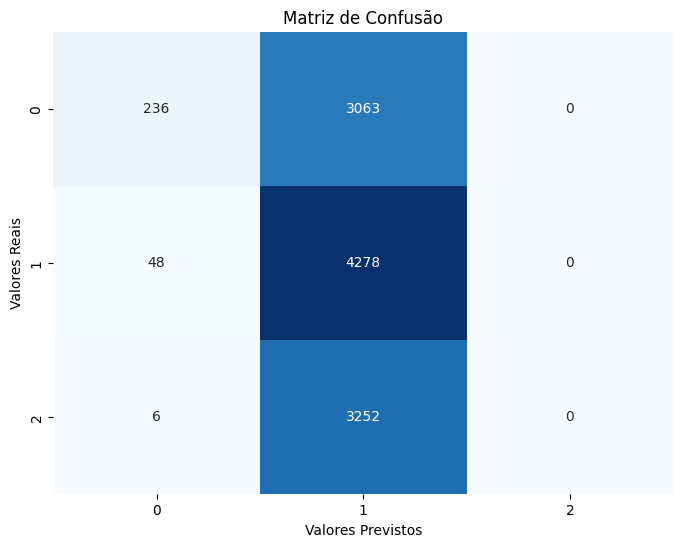

In [302]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

In [303]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_svm

0.41477533768262426

In [304]:
print(classification_report(y_test, y_pred_svm))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.81      0.07      0.13      3299
           2       0.40      0.99      0.57      4326
           3       0.00      0.00      0.00      3258

    accuracy                           0.41     10883
   macro avg       0.41      0.35      0.24     10883
weighted avg       0.41      0.41      0.27     10883



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# K-nearest neighbors (KNN)

In [305]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [306]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [307]:
knn_regressor.fit(x_train, y_train)

KNeighborsRegressor()

In [308]:
y_pred = knn_regressor.predict(x_test)

In [309]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.3198309289717909
R-squared: 0.4691471715564375


# Teste de regressão logística

In [310]:
from sklearn.linear_model import LogisticRegression

In [311]:
logistic_regression = LogisticRegression(max_iter=10000)

In [312]:
logistic_regression.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [313]:
y_pred = logistic_regression.predict(x_test)

In [314]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Acurácia:", accuracy)
print("Relatório de Classificação:\n", classification_rep)

Acurácia: 0.5964348065790682
Relatório de Classificação:
               precision    recall  f1-score   support

           1       0.58      0.60      0.59      3299
           2       0.56      0.59      0.58      4326
           3       0.67      0.59      0.63      3258

    accuracy                           0.60     10883
   macro avg       0.60      0.60      0.60     10883
weighted avg       0.60      0.60      0.60     10883



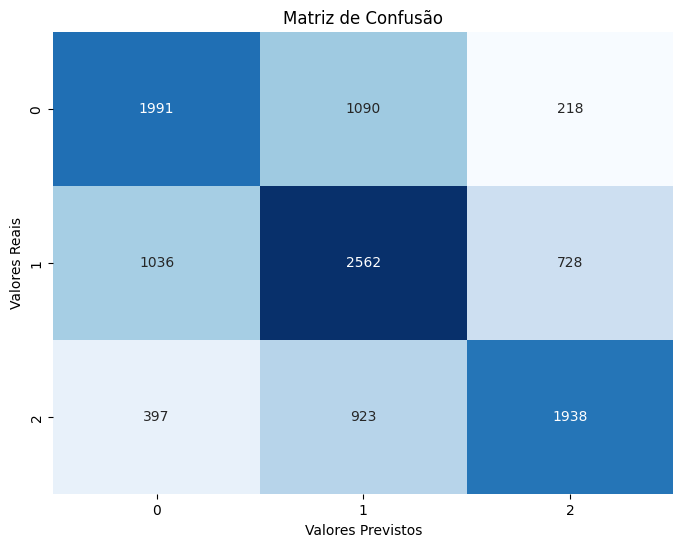

In [315]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

# RandomForest

In [316]:
from sklearn.ensemble import RandomForestClassifier

In [317]:
clf = RandomForestClassifier(n_estimators=150, max_depth=80, criterion="log_loss")

In [318]:
clf.fit(x_train, y_train)

RandomForestClassifier(criterion='log_loss', max_depth=80, n_estimators=150)

In [319]:

y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8550951024533676


# Extra Trees

In [320]:
from sklearn.ensemble import ExtraTreesClassifier

In [321]:
model = ExtraTreesClassifier()


In [322]:

model.fit(x_train, y_train)


ExtraTreesClassifier()

In [323]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

Acurácia: 0.8425985481944317


# XGBoost

In [324]:
import xgboost

In [325]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [326]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

model_xgboost = xgboost.XGBClassifier(n_estimators=218, max_depth=128, learning_rate=0.25)
model_xgboost.fit(x_train, y_train)
y_pred = model_xgboost.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')

print(f'F1-score: {f1}')
print(f'Acurácia: {accuracy}')

F1-score: 0.8712671138472847
Acurácia: 0.8712671138472847


# Grid de parâmetros - XGBoost - (não funcionou)

In [327]:
#from sklearn.model_selection import GridSearchCV

# Definir os parâmetros:
#parametros = {
    #'n_estimators': [200, 220, 300, 400],
    #'max_depth': [128],
    #'learning_rate': [0.25, 0.30, 0.20, 0.15]

#}

# Criar modelo XGBoost
#model_xgboost = xgboost.XGBClassifier()

# Realizar a pesquisa de grade
#grid_search = GridSearchCV(model_xgboost, parametros, scoring='accuracy')
#grid_search.fit(x_train, y_train)

# Imprimir os melhores parâmetros
#print(grid_search.best_params_)

# XGBoost com validação cruzada

In [328]:
from sklearn.model_selection import cross_val_score, KFold

In [329]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [330]:
Y_transf = le.fit_transform(Y)

In [331]:
scores = cross_val_score(model_xgboost, X, Y_transf, cv=kf, scoring='accuracy')

In [332]:
print("Accuracy Scores:", scores)
print("Accuracy Média:", scores.mean())
print("Desvio Padrão da Accuracy:", scores.std())

Accuracy Scores: [0.87884218 0.88173673 0.87415575 0.87512061 0.86767746]
Accuracy Média: 0.8755065472088214
Desvio Padrão da Accuracy: 0.004758356598430954


# Teste de desempenho
## Removendo colunas que aparentemente apresentam uma baixa correlação com preço

In [333]:
#df_encoded.drop('arrival_month', axis=1, inplace=True)
#df_encoded.drop('arrival_date', axis=1, inplace=True)
#df_encoded.drop('repeated_guest', axis=1, inplace=True)
#df_encoded.drop('no_of_previous_cancellations', axis=1, inplace=True)
#df_encoded.drop('no_of_previous_bookings_not_canceled', axis=1, inplace=True)
#df_encoded.drop('no_of_special_requests', axis=1, inplace=True)
#df_encoded.drop('booking_status', axis=1, inplace=True)
#df_encoded.drop('market_segment_type', axis=1, inplace=True)


# Teste de Overfitting

In [334]:
xgb_train_accuracy = accuracy_score(y_train, clf.predict(x_train))

In [335]:
xgb_train_accuracy

0.0016146817895400126

In [336]:
df_encoded['label_avg_price_per_room'].value_counts()

2    14262
3    11062
1    10951
Name: label_avg_price_per_room, dtype: int64

In [337]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      3299
           1       0.85      0.85      0.85      4326
           2       0.88      0.90      0.89      3258

    accuracy                           0.87     10883
   macro avg       0.87      0.87      0.87     10883
weighted avg       0.87      0.87      0.87     10883



In [338]:
# from sklearn.model_selection import GridSearchCV

# parameters = {
#    "n_estimators": [200, 350, 400],
#    "max_depth": [100, 120, 140],
#    "learning_rate": [0.1, 0.05, 0.01, 0.25],
#    "min_child_weight": [2, 4, 5],
#   "gamma": [0.3, 0.4],
#    "subsample": [0.7, 0.9, 1.0],
#}

# grid = GridSearchCV(clf, parameters, scoring="accuracy", cv=5)

# grid.fit(X, Y)

# print(grid.best_params_)

In [339]:
# print(grid.best_params_)